In [1]:
import sys
sys.path.append('../')
import data_utils as du
import model_utils as mu
from LNNet import LNNet
import plotting_functions as pf
import torch

In [2]:
from ipywidgets import interact, IntSlider, FloatSlider, fixed
from ipywidgets import FloatLogSlider, Layout, VBox
from ipywidgets import interactive_output

import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")


In [3]:
SEED = 2021
mu.set_seed(seed=SEED)
DEVICE = mu.set_device()

GPU is not enabled in this notebook. 
If you want to enable it, in the menu under `Runtime` -> 
`Hardware accelerator.` and select `GPU` from the dropdown menu


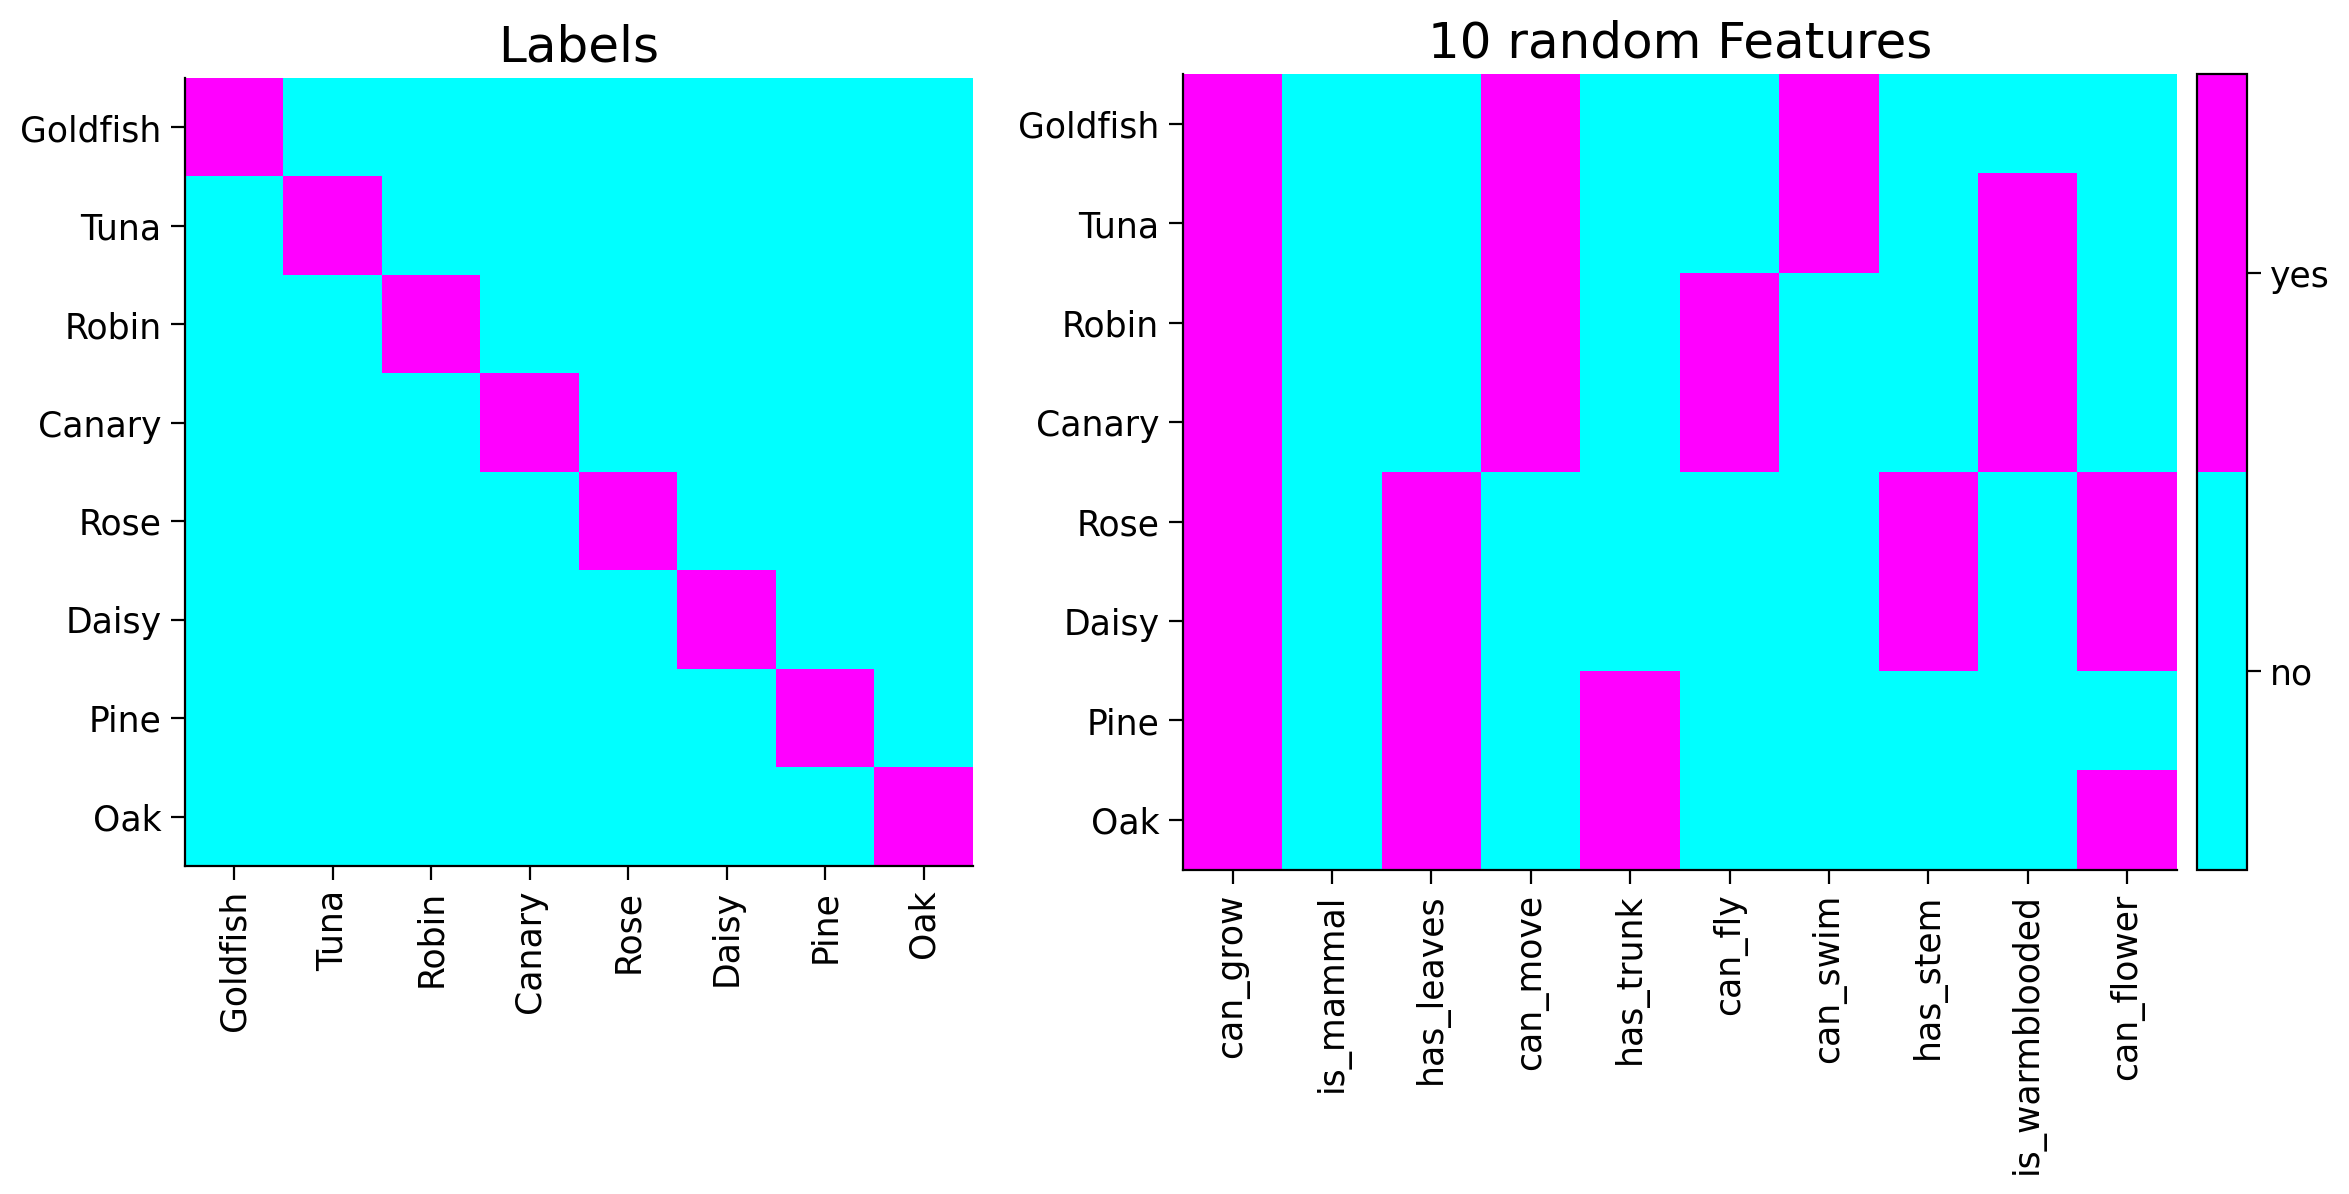

---------------------------------------------------------------
Input Dimension: 8
Output Dimension: 10000
Number of samples: 8


In [4]:
# @markdown #### Run to generate and visualize training samples from tree

tree_labels, tree_features = du.generate_hsd()

# Convert (cast) data from np.ndarray to torch.Tensor
label_tensor = torch.tensor(tree_labels).float()
feature_tensor = torch.tensor(tree_features).float()

item_names = ['Goldfish', 'Tuna', 'Robin', 'Canary',
              'Rose', 'Daisy', 'Pine', 'Oak']

pf.plot_tree_data()

# Dimensions
print("---------------------------------------------------------------")
print("Input Dimension: {}".format(tree_labels.shape[1]))
print("Output Dimension: {}".format(tree_features.shape[1]))
print("Number of samples: {}".format(tree_features.shape[0]))

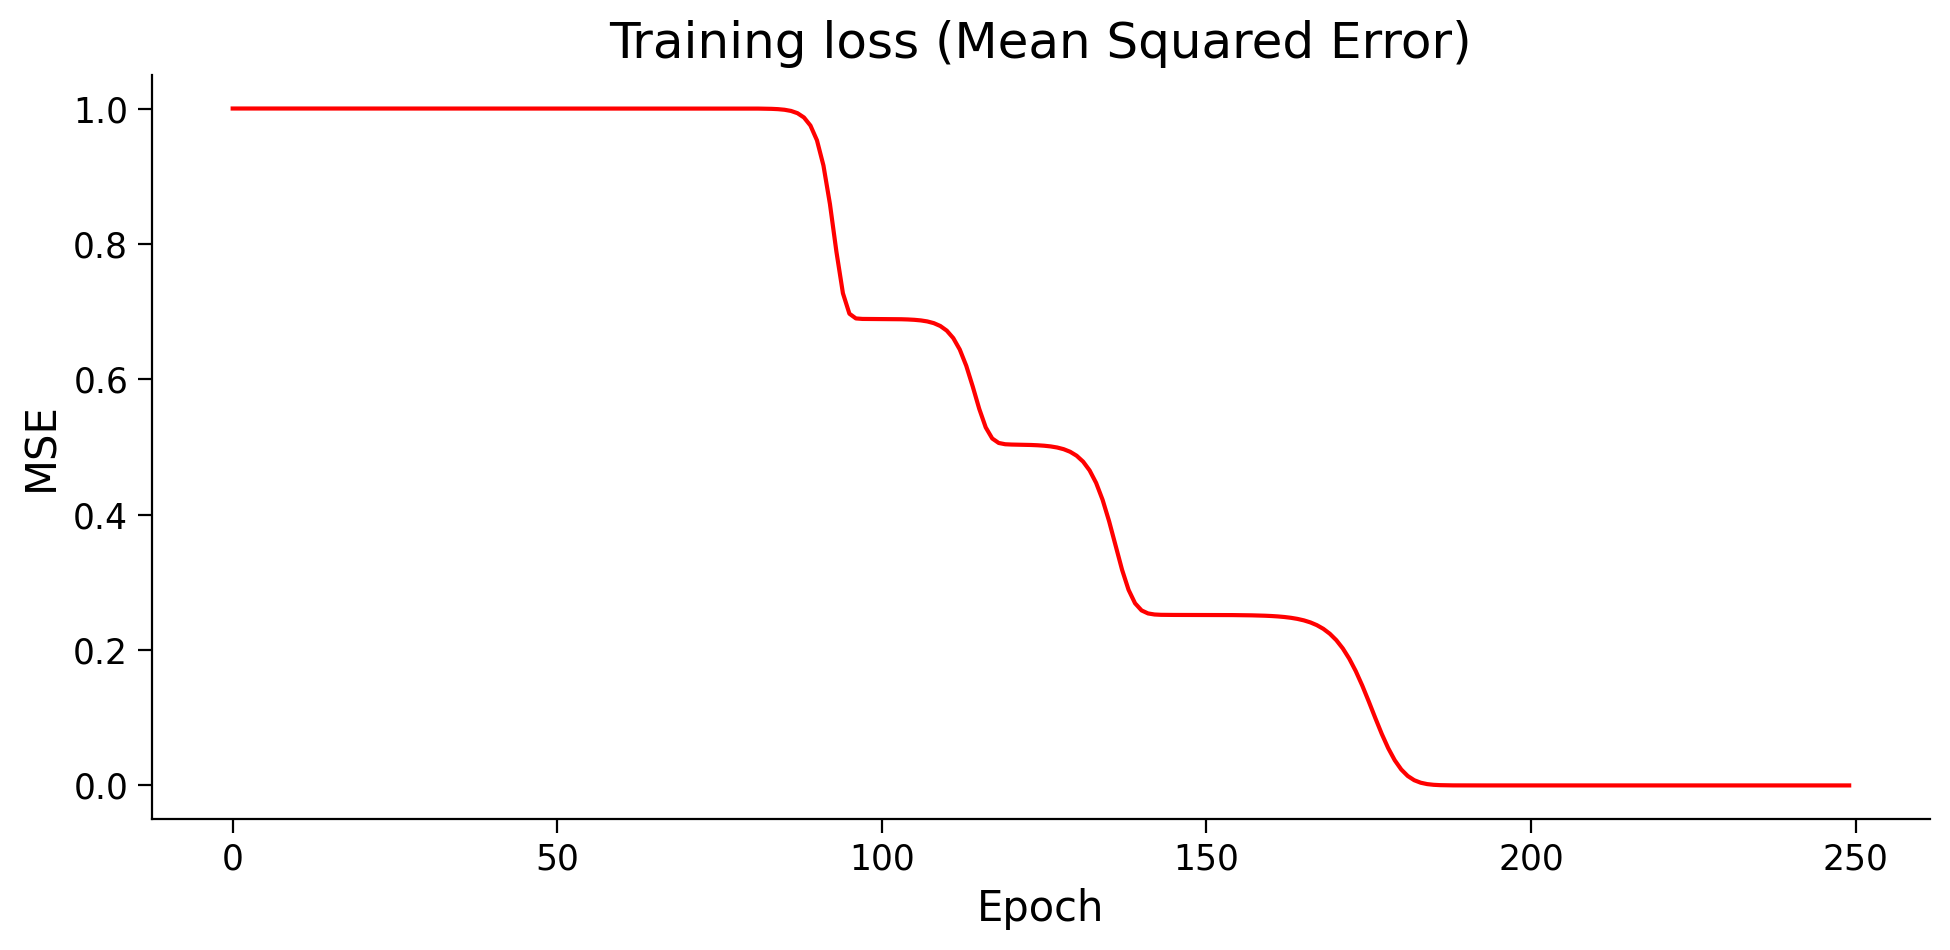

In [5]:
# @markdown #### Make sure you execute this cell to train the network and plot

lr = 100.0  # Learning rate
gamma = 1e-12  # Initialization scale
n_epochs = 250  # Number of epochs
dim_input = 8  # Input dimension = `label_tensor.size(1)`
dim_hidden = 30  # Hidden neurons
dim_output = 10000  # Output dimension = `feature_tensor.size(1)`

# Model instantiation
dlnn_model = LNNet(dim_input, dim_hidden, dim_output)

# Weights re-initialization
mu.initializer_(dlnn_model, gamma)

# Training
losses, *_ = mu.train(dlnn_model,
                  label_tensor,
                  feature_tensor,
                  n_epochs=n_epochs,
                  lr=lr)

# Plotting
pf.plot_loss(losses)

In [6]:
# @markdown #### Make sure you execute this cell to enable the widget!

def loss_lr_init(lr, gamma):
  """
  Trains and plots the loss evolution

  Args:
    lr: float
      Learning rate
    gamma: float
      Initialization scale

  Returns:
    Nothing
  """
  n_epochs = 250  # Number of epochs
  dim_input = 8  # Input dimension = `label_tensor.size(1)`
  dim_hidden = 30  # Hidden neurons
  dim_output = 10000  # Output dimension = `feature_tensor.size(1)`

  # Model instantiation
  dlnn_model = LNNet(dim_input, dim_hidden, dim_output)

  # Weights re-initialization
  mu.initializer_(dlnn_model, gamma)

  losses, *_ = mu.train(dlnn_model,
                    label_tensor,
                    feature_tensor,
                    n_epochs=n_epochs,
                    lr=lr)

  pf.plot_loss(losses)

_ = interact(loss_lr_init,
             lr = FloatSlider(min=1.0, max=200.0,
                              step=1.0, value=100.0,
                              continuous_update=False,
                              readout_format='.1f',
                              description='eta'),
             epochs = fixed(250),
             gamma = FloatLogSlider(min=-15, max=1,
                                    step=1, value=1e-12, base=10,
                                    continuous_update=False,
                                    description='gamma')
             )

interactive(children=(FloatSlider(value=100.0, continuous_update=False, description='eta', max=200.0, min=1.0,…

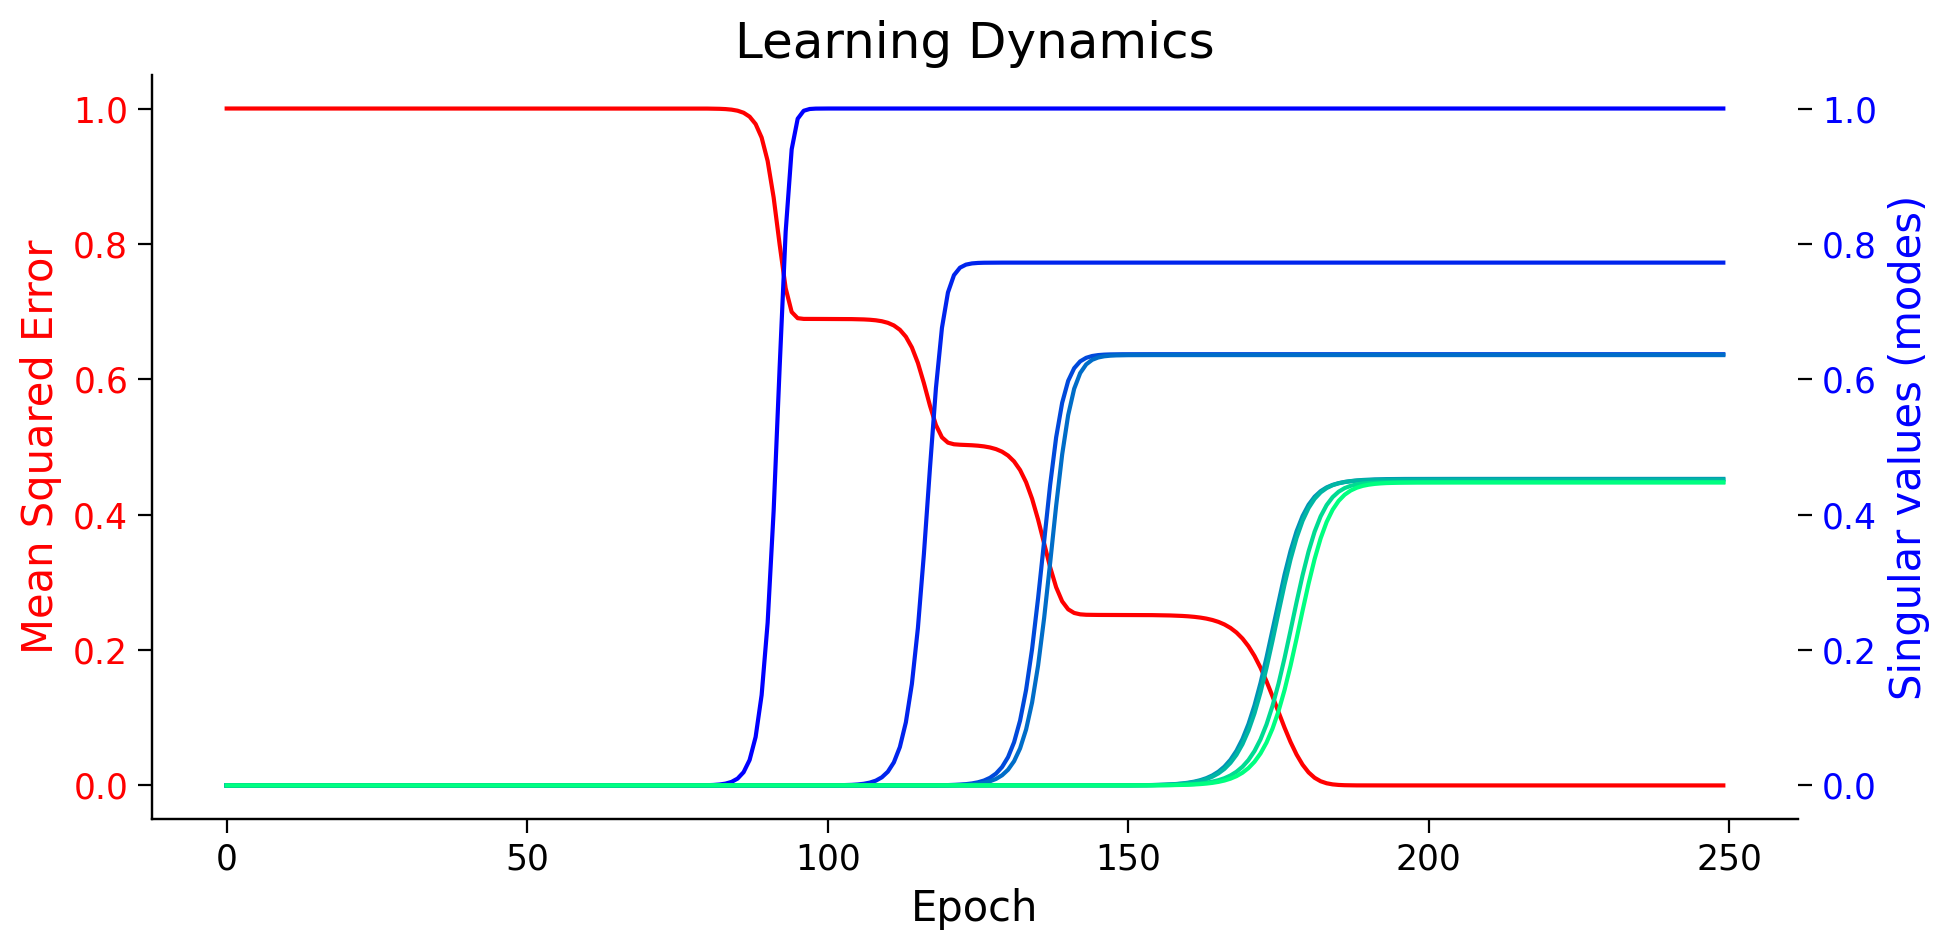

In [18]:
# @markdown #### Make sure you execute this cell to train the network and plot

lr = 100.0  # Learning rate
gamma = 1e-12  # Initialization scale
n_epochs = 250  # Number of epochs
dim_input = 8  # Input dimension = `label_tensor.size(1)`
dim_hidden = 30  # Hidden neurons
dim_output = 10000  # Output dimension = `feature_tensor.size(1)`

# Model instantiation
dlnn_model = LNNet(dim_input, dim_hidden, dim_output)

# Weights re-initialization
mu.initializer_(dlnn_model, gamma, trunc=False)

# Training
losses, modes, *_ = mu.train(dlnn_model,
                          label_tensor,
                          feature_tensor,
                          n_epochs=n_epochs,
                          lr=lr)

pf.plot_loss_sv_twin(losses, modes)


Output()

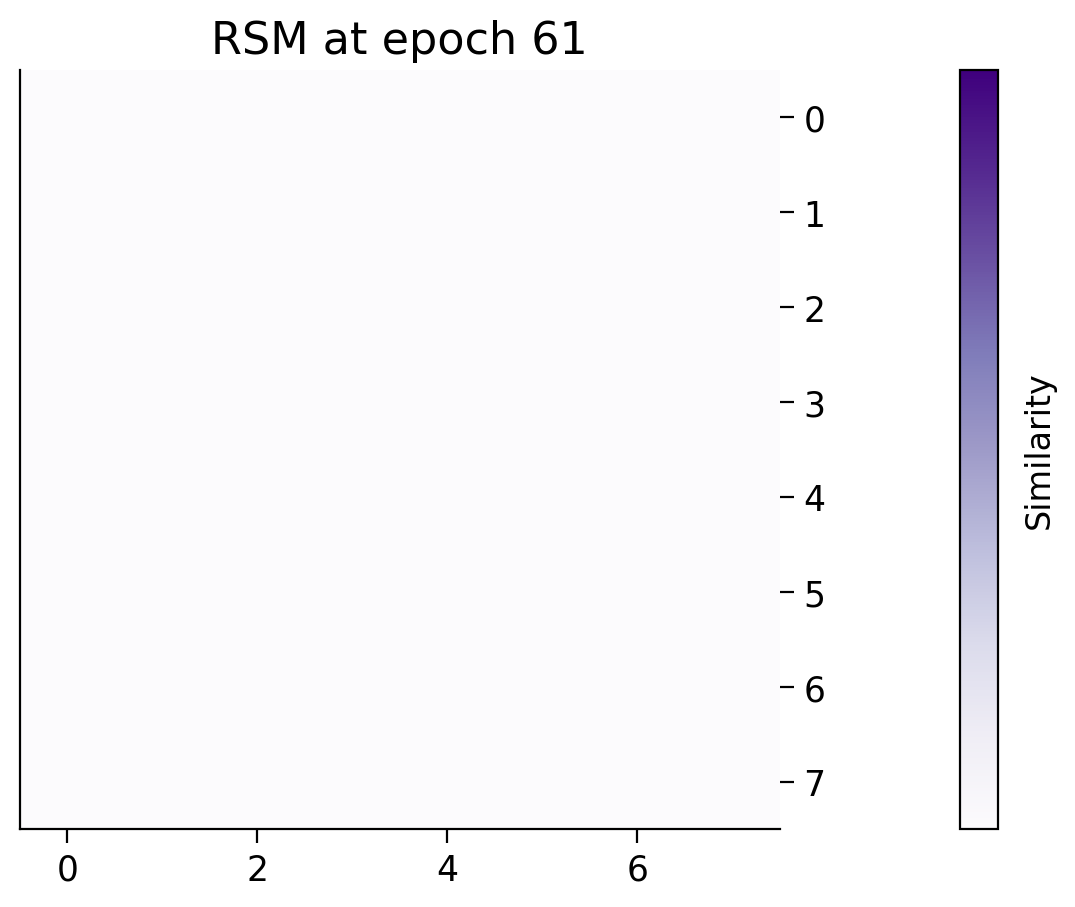

In [9]:
from IPython.core.display_functions import display


#@markdown #### Make sure you execute this cell to enable widgets

def loss_svd_rsm_lr_gamma(lr, gamma, i_ep):
  """
  Widget to record loss/mode/RSM at every iteration

  Args:
    lr: float
      Learning rate
    gamma: float
      Initialization scale
    i_ep: int
      Which epoch to show

  Returns:
    Nothing
  """
  n_epochs = 250  # Number of epochs
  dim_input = 8  # Input dimension = `label_tensor.size(1)`
  dim_hidden = 30  # Hidden neurons
  dim_output = 10000  # Output dimension = `feature_tensor.size(1)`

  # Model instantiation
  dlnn_model = LNNet(dim_input, dim_hidden, dim_output)

  # Weights re-initialization
  mu.initializer_(dlnn_model, gamma)

  # Training
  losses, modes, rsms, _ = mu.train(dlnn_model,
                                 label_tensor,
                                 feature_tensor,
                                 n_epochs=n_epochs,
                                 lr=lr)
  pf.plot_loss_sv_rsm(losses, modes, rsms, i_ep)

i_ep_slider = IntSlider(min=10, max=241, step=1, value=61,
                        continuous_update=False,
                        description='Epoch',
                        layout=Layout(width='630px'))

lr_slider = FloatSlider(min=20.0, max=200.0, step=1.0, value=100.0,
                        continuous_update=False,
                        readout_format='.1f',
                        description='eta')

gamma_slider = FloatLogSlider(min=-15, max=1, step=1,
                              value=1e-12, base=10,
                              continuous_update=False,
                              description='gamma')

widgets_ui = VBox([lr_slider, gamma_slider, i_ep_slider])

widgets_out = interactive_output(loss_svd_rsm_lr_gamma,
                                 {'lr': lr_slider,
                                  'gamma': gamma_slider,
                                  'i_ep': i_ep_slider})

display(widgets_ui, widgets_out)